# 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
#Defining path
path=r'/Users/frankamoboateng/Downloads/19.08.23 World University Rankings'

In [4]:
#importing data
df_uni = pd.read_csv(os.path.join(path,'02. DATA','PREPARED DATA','uni_ranks.csv'), index_col = False)

In [5]:
df_uni.shape

(2000, 15)

In [7]:
df_uni.head()

,Unnamed: 0,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
1,201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
2,202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
3,203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
4,204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014


In [29]:
# Create a subset excluding the "Unnamed:0", "Country" "year"

sub = df_uni[['world_rank', 'national_rank', 'quality_of_education','alumni_employment', 
              'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 'score']]

In [39]:
sub.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
0,1,1,1,1,1,1,1,1,1.0,2,100.00
1,2,2,11,2,4,5,3,3,4.0,6,99.09
2,3,3,3,11,2,15,2,2,2.0,1,98.69
3,4,1,2,10,5,10,9,12,13.0,48,97.64
4,5,2,7,12,10,11,12,11,12.0,16,97.51


### 2. The elbow technique

In [31]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [33]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/frankamoboateng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/frankamoboateng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/frankamoboateng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/frankamoboateng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

[-1016960169.5820663,
 -425746200.52697694,
 -309413381.0707601,
 -273038461.58451664,
 -246952451.80559325,
 -225763635.23280227,
 -209627767.67735076,
 -198247093.7863788,
 -187428409.5017466]

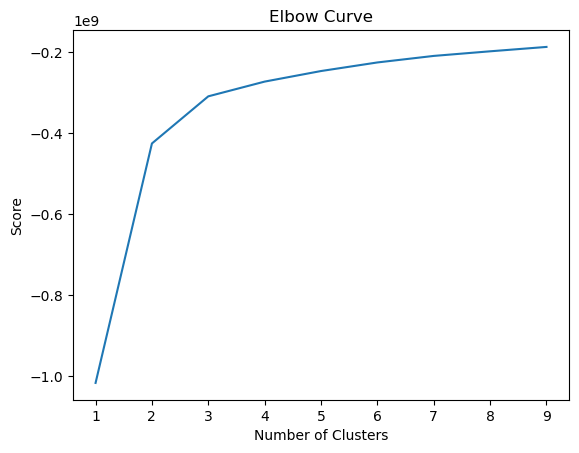

In [34]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 3. k-means clustering

In [36]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 



In [38]:
# Fit the k-means object to the data.

kmeans.fit(sub)

/Users/frankamoboateng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [41]:
sub['clusters'] = kmeans.fit_predict(sub)

/Users/frankamoboateng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/gm/rfy01dmd40x82fb513crfbm80000gn/T/ipykernel_88762/3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [42]:
sub.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,clusters
0,1,1,1,1,1,1,1,1,1.0,2,100.00,1
1,2,2,11,2,4,5,3,3,4.0,6,99.09,1
2,3,3,3,11,2,15,2,2,2.0,1,98.69,1
3,4,1,2,10,5,10,9,12,13.0,48,97.64,1
4,5,2,7,12,10,11,12,11,12.0,16,97.51,1


In [43]:
sub['clusters'].value_counts()

0    759
2    662
1    579
Name: clusters, dtype: int64

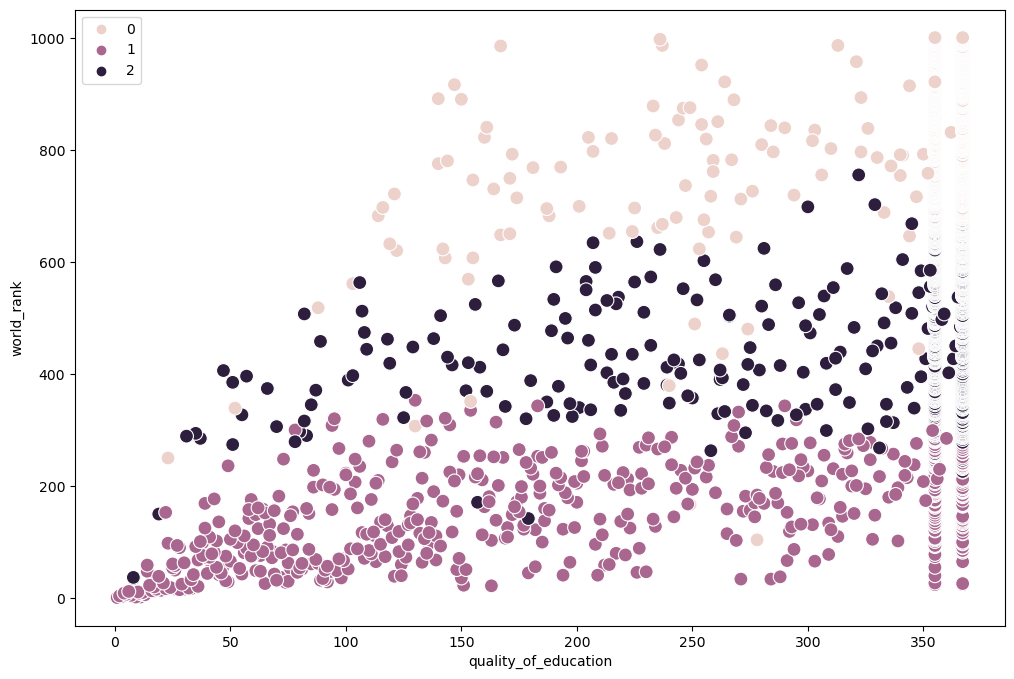

In [45]:
# Plot the clusters for the "world_rank" and "quality_of_education" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['quality_of_education'], y=sub['world_rank'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('quality_of_education') # Label x-axis.
plt.ylabel('world_rank') # Label y-axis.
plt.show()

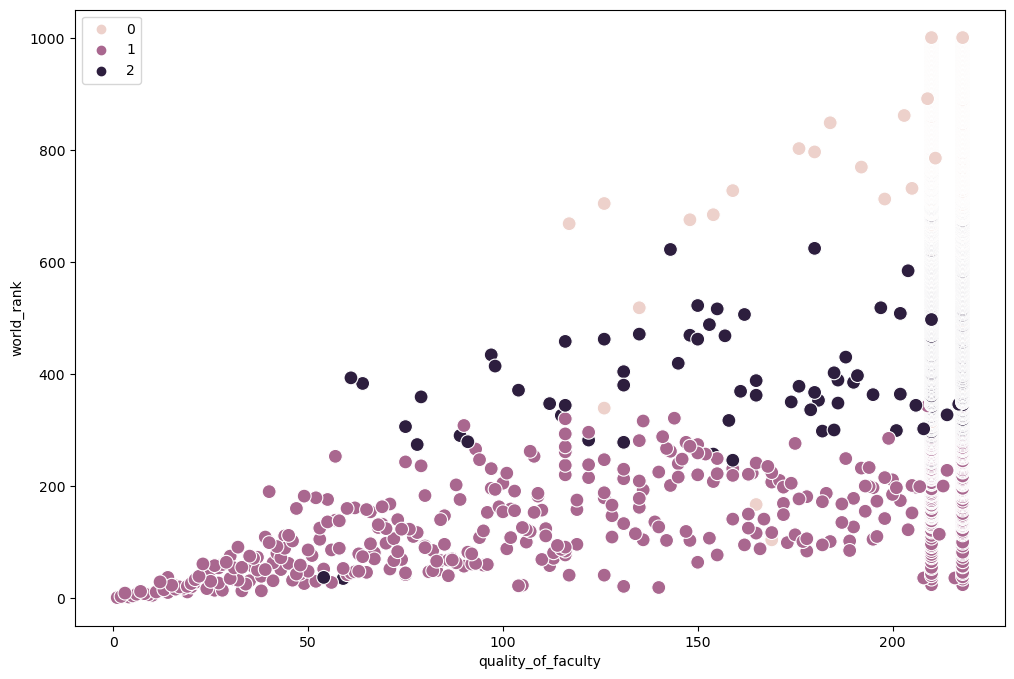

In [46]:
# Plot the clusters for the "quality_of_faculty" and "world_rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['quality_of_faculty'], y=sub['world_rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('quality_of_faculty') 
plt.ylabel('world_rank') 
plt.show()

## the clusters make sense as it helps us discover the patterns here 

In [49]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/gm/rfy01dmd40x82fb513crfbm80000gn/T/ipykernel_88762/749661046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [50]:
sub.groupby('cluster').agg({'patents':['mean', 'median'], 
                         'quality_of_faculty':['mean', 'median'], 
                         'quality_of_education':['mean', 'median'],
                          'world_rank':['mean', 'median']})

patents        quality_of_faculty        quality_of_education  \
                   mean median               mean median                 mean   
cluster                                                                         
dark purple  496.628399  505.0         207.975831  210.0           326.271903   
pink         631.346509  697.0         213.021080  210.0           343.724638   
purple       229.157168  181.0         143.164076  167.0           198.832470   

                    world_rank         
            median        mean median  
cluster                                
dark purple  355.0  466.637462  462.5  
pink         355.0  797.811594  811.0  
purple       185.0  149.476684  147.0

### Descriptive statistics provide a comprehensive overview of each cluster's characteristics. This helps analysts gain insights into the data distribution, central tendency, and variability within different clusters.  Exploring these statistics helps you understand the data's nuances and aids in making informed decisions. 